In [1]:
import matplotlib.pyplot as plt # like in matlab (also "seaborn" for plotting)
import numpy as np

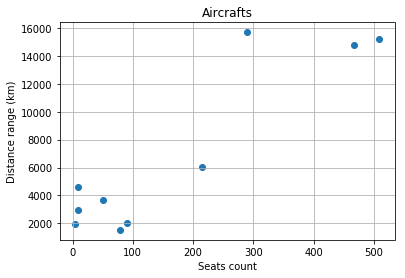

In [2]:
X=np.array([(4,1940),(9,2960),(9,4630),(78,1528),(90,2040),(50,3700),(467,14815),(509,15200),(290,15700),(215,6045)])

x1 = np.array(X[:,0])
x2 = np.array(X[:,1])

fig, ax = plt.subplots()
ax.scatter(x1,x2)
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts')
ax.grid()
plt.show()

In [3]:
#normalizing data
train_data = np.array(X)
max_values = train_data.max(0)

X_norm = np.divide(train_data,max_values)

In [4]:
print(X_norm)

[[0.00785855 0.12356688]
 [0.01768173 0.18853503]
 [0.01768173 0.29490446]
 [0.15324165 0.09732484]
 [0.17681729 0.12993631]
 [0.09823183 0.23566879]
 [0.91748527 0.94363057]
 [1.         0.96815287]
 [0.5697446  1.        ]
 [0.42239686 0.38503185]]


In [5]:
import random
data_set = X_norm
groups = 2
space=[[0,1],[0,1]]

error_margin = 0.00001
m = 2.0 # fixed value, parameter, usually 2

#assignation matrix set to something close to zero at the beginning
assignation = (np.random.rand(len(X),groups) + 0.01) / 10
print(assignation)

[[0.09176788 0.09662526]
 [0.09465058 0.06412858]
 [0.03261748 0.0737898 ]
 [0.09327914 0.06878721]
 [0.04254975 0.04433917]
 [0.06436595 0.10080931]
 [0.0852484  0.07904463]
 [0.06173668 0.00671677]
 [0.06238558 0.09574788]
 [0.00677417 0.02126799]]


In [6]:
centers = []

def select_centers():
    global centers
    global groups
    global space
    iter = 0
    while iter < groups:
        centers.append((random.uniform(space[0][0],space[0][1]), 
                        random.uniform(space[1][0],space[1][1])))
        iter=iter+1
        
select_centers()

In [7]:
print(centers)

[(0.23253863389135898, 0.8402276407761169), (0.18990632749913494, 0.08397566621878594)]


In [8]:
global inv_covariance
covariance = np.cov(X_norm[:,0], X_norm[:,1], rowvar=0)
inv_covariance = np.linalg.inv(covariance)
print(covariance)
print(inv_covariance)

[[0.1407423  0.1289333 ]
 [0.1289333  0.14320383]]
[[ 40.5557139  -36.51426257]
 [-36.51426257  39.85860298]]


In [9]:
import math

def mahalanobis_distance(x, v):
    return max(np.sqrt(np.dot(np.dot(np.transpose(x - v), inv_covariance), (x - v))), 0.00000001)

In [10]:
def calculate_u(x, i):
    global centers
        
    u_x = 0.0
    u_scalar = 0.0
    for j in range(len(data_set)):
        u_scalar = u_scalar + (assignation[j][i]**m)
        u_x = u_x + ((assignation[j][i]**m) * (mahalanobis_distance(X_norm[j], centers[i])**2))
    eta_i = u_x / u_scalar
    
    suma = 1.0 + ((mahalanobis_distance(x, centers[i]) / eta_i)**(2/(m-1)))
    print('sum: ', suma**-1)
    return suma**-1

In [11]:
def calculate_new_centers(u):
    global centers
    new_centers = []
    for c in range(groups):
        u_x_vector = np.zeros(2)
        u_scalar = 0.0
        for i in range(len(data_set)):
            u_scalar = u_scalar + (u[i][c]**m)
            u_x_vector = np.add(u_x_vector, np.multiply(u[i][c]**m, data_set[i]))
        new_centers.append(np.divide(u_x_vector, u_scalar))
    centers = new_centers
    print(centers)

In [12]:
def calculate_differences(new_assignation):
    global assignation    
    return np.sum(np.abs(np.subtract(assignation,new_assignation)))

In [13]:
def cluster():
    global assignation    
    global error_margin
    difference_limit_not_achieved = True
    iter = 0
    while difference_limit_not_achieved:
        new_assignation = []
        for i in range(len(data_set)):
            new_assignation_vector = []
            for k in range(groups):
                new_assignation_vector.append(calculate_u(data_set[i], k))
            new_assignation.append(new_assignation_vector)
        calculate_new_centers(new_assignation)
        
        #print('assignation: ', assignation)
        if iter > 0:
            print(calculate_differences(new_assignation))
            if calculate_differences(new_assignation) < error_margin:
                difference_limit_not_achieved = False
        assignation = new_assignation
        iter = iter + 1

In [14]:
cluster()

sum:  0.9303125732497843
sum:  0.9210423138130707
sum:  0.9436669056458609
sum:  0.8841708141399469
sum:  0.9652660088269982
sum:  0.8002167090765073
sum:  0.888911097060945
sum:  0.9957003118009152
sum:  0.8922587274209501
sum:  0.9940448469385775
sum:  0.9387631819671001
sum:  0.9084005900546347
sum:  0.9095709454489178
sum:  0.8111949683413494
sum:  0.892120637353312
sum:  0.8048465318695586
sum:  0.9883408604993317
sum:  0.6188482530282235
sum:  0.8995944683985413
sum:  0.9701717836971261
[array([0.3316857 , 0.44103477]), array([0.29938355, 0.37038442])]
sum:  0.8153595310654541
sum:  0.7771217735284092
sum:  0.8178382266449702
sum:  0.7310940496920105
sum:  0.6919197930742921
sum:  0.5332687941982883
sum:  0.6887826907252486
sum:  0.7006600736024553
sum:  0.719590082533967
sum:  0.7395703614878849
sum:  0.8961505365911148
sum:  0.8487397923963588
sum:  0.5753737560734528
sum:  0.44322003427082446
sum:  0.492982585584377
sum:  0.3775537560332401
sum:  0.4007357404640567
sum:  0.254

In [15]:
print(centers)

[array([0.09823183, 0.23566879]), array([0.00785855, 0.12356688])]


In [16]:
print(assignation)

[[1.0837141761955723e-31, 1.0000000000000048e-16], [1.3436219546150183e-31, 7.965292388848335e-32], [1.3307641324408995e-32, 9.513731660599312e-33], [6.937950565330774e-33, 8.596540061228195e-33], [7.675485686921695e-33, 9.252643792617675e-33], [1.0000000000000056e-16, 1.0837141761955712e-31], [2.0656880783202347e-33, 1.6989567376839023e-33], [1.6320687715447203e-33, 1.3968830723880746e-33], [1.6713707236919732e-33, 1.3409190816369188e-33], [6.19188301490942e-33, 5.622066401505221e-33]]


In [17]:
red = X_norm[np.where(np.array(assignation)[:,0] > np.array(assignation)[:,1])]
blue = X_norm[np.where(np.array(assignation)[:,1] > np.array(assignation)[:,0])]

#red = X_norm[np.where(np.array(assignation)[:,0] > np.array(assignation)[:,1]) and np.where(np.array(assignation)[:,0] > np.array(assignation)[:,2])]
#blue = X_norm[np.where(np.array(assignation)[:,1] > np.array(assignation)[:,0]) and np.where(np.array(assignation)[:,1] > np.array(assignation)[:,2])]
#orange = X_norm[np.where(np.array(assignation)[:,2] > np.array(assignation)[:,0]) and np.where(np.array(assignation)[:,2] > np.array(assignation)[:,1])]

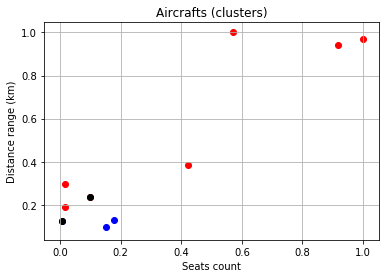

In [18]:
fig, ax = plt.subplots()

ax.scatter(blue[:,0],blue[:,1],c='blue')
ax.scatter(red[:,0],red[:,1],c='red')
#ax.scatter(orange[:,0],orange[:,1],c='orange')
ax.scatter(np.array(centers)[:,0],np.array(centers)[:,1],c='black')
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts (clusters)')
ax.grid()
plt.show()